# Explore here

## Paso 3: Variables de entorno

In [14]:
import os
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Obtener las credenciales desde las variables de entorno
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

## Paso 4: Inicializar la biblioteca Spotipy

In [15]:
# Inicializar Spotipy con autenticación de cliente
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

## Paso 5: Realizar solicitudes a la API

In [20]:
# ID del artista (Bad Bunny)
artist_id = "4q3ewBCX7sLwd24euuV69X"

# Obtener el top 10 de canciones más populares del artista
top_tracks = sp.artist_top_tracks(artist_id)

#Ver el objeto JSON
print(top_tracks)

# Extraer nombre, popularidad y duración (convertida a minutos)
tracks_data = []
for track in top_tracks['tracks'][:10]:  # Top 10 canciones
    name = track['name']
    popularity = track['popularity']
    duration_min = track['duration_ms'] / (1000 * 60)  # Convertir de milisegundos a minutos
    tracks_data.append([name, popularity, round(duration_min, 2)])

#Ver la lista
print(tracks_data)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4q3ewBCX7sLwd24euuV69X'}, 'href': 'https://api.spotify.com/v1/artists/4q3ewBCX7sLwd24euuV69X', 'id': '4q3ewBCX7sLwd24euuV69X', 'name': 'Bad Bunny', 'type': 'artist', 'uri': 'spotify:artist:4q3ewBCX7sLwd24euuV69X'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF',

## Paso 6: Transformar a Pandas DataFrame

In [22]:
# Convertir a DataFrame
tracks_df = pd.DataFrame(tracks_data, columns=['name', 'popularity', 'duration_min'])

# Ordenar por popularidad descendente
df_sorted = tracks_df.sort_values(by='popularity', ascending=False)

# Mostrar el top 3 de canciones más populares
print(df_sorted.head(3))

                name  popularity  duration_min
0               DtMF          93          3.95
1  BAILE INoLVIDABLE          92          6.13
2           NUEVAYoL          90          3.06


## Paso 7: Analizar relación estadística

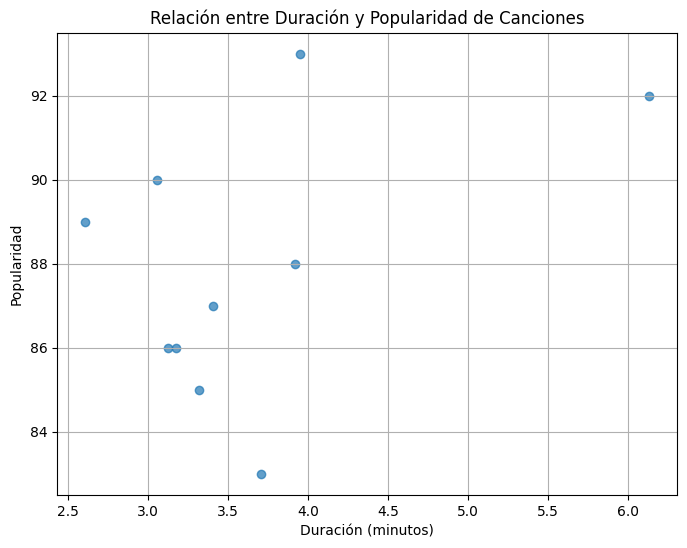

In [23]:
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tracks_df['duration_min'], tracks_df['popularity'], alpha=0.7)
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.title('Relación entre Duración y Popularidad de Canciones')
plt.grid(True)
plt.show()

<h2>Interpretación:</h2>

<ul>
    <li>No parece haber una relación directa entre la duración y la popularidad. Las canciones más populares tienen duraciones variadas, sin una tendencia clara de que las canciones más cortas o más largas sean más populares.</li>
    <li>Esto sugiere que la popularidad de una canción puede depender más de factores como la promoción, el artista, la viralidad en redes sociales o la calidad percibida, en lugar de su duración.</li>
</ul>

<p>Por lo tanto, no se puede concluir que una canción corta sea necesariamente más popular que una larga o viceversa.</p>
